In [4]:
# Step 1: Load the data from CSV file into a pandas DataFrame
import pandas as pd

data = pd.read_csv('merged_data.csv')

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['Longitude', 'Latitude', 'Direction']]
y = data['Wrong side']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3 and 4: Create feature matrix and label vectors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Standardize the feature matrices using StandardScaler from sklearn

# Train a SVM model using SVC from sklearn
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42 )

svm.fit(X_train_scaled, y_train)

# Evaluate the model on the test set and calculate accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)



Accuracy: 0.5875
Precision: 0.43333333333333335
Recall: 0.4482758620689655
F1-score: 0.44067796610169496


In [5]:
# Build a predictive system to predict whether a given input corresponds to wrong side driving
def predict_wrong_side_driving(longitude, latitude, direction):
    input_data = [[longitude, latitude, direction]]
    input_data_scaled = scaler.transform(input_data)
    prediction = svm.predict(input_data_scaled)
    if prediction[0] == 1:
        return 'Wrong Side Driving.'
    else:
        return 'Not Wrong Side Driving.'



In [9]:
# Sample longitude, latitude and direction values 
longitude = 28.24351379
latitude = 83.51997744
direction = 108.2068836

# Call the function
result = predict_wrong_side_driving(longitude, latitude, direction)

# Print the result
print(result)

Not Wrong Side Driving.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


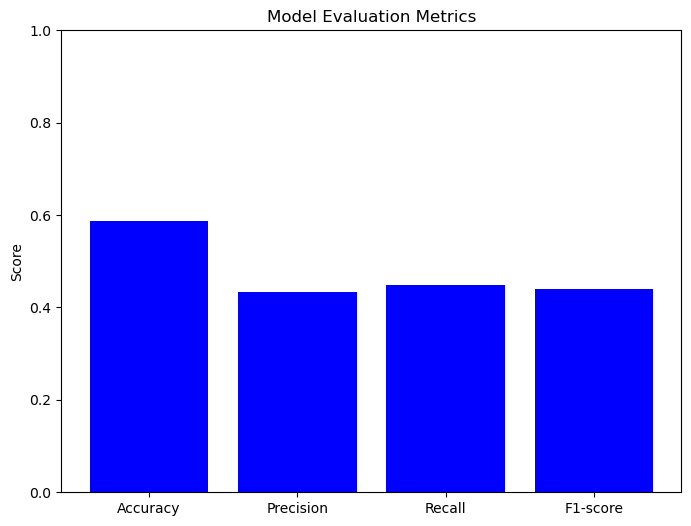

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metrics
Accuracy = 0.5875
Precision = 0.43333333333333335
Recall = 0.4482758620689655
F1score = 0.44067796610169496

# Create a bar plot of the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics, values, color='b')
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Evaluation Metrics')
plt.show()


In [29]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[34 17]
 [16 13]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


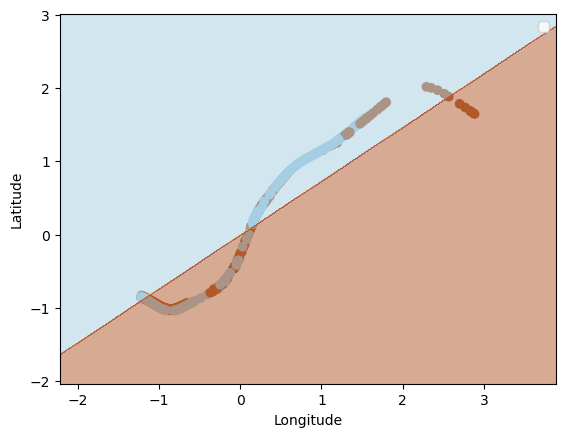

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Load the data from CSV file into a pandas DataFrame
data = pd.read_csv('merged_data.csv')

# Extract the features and labels
X = data[['Longitude', 'Latitude']].values
y = data['Wrong side'].values

# Standardize the feature matrix using StandardScaler from sklearn
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train an SVM model using SVC from sklearn
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a mesh to plot in
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the results in a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Add a legend and show the plot
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


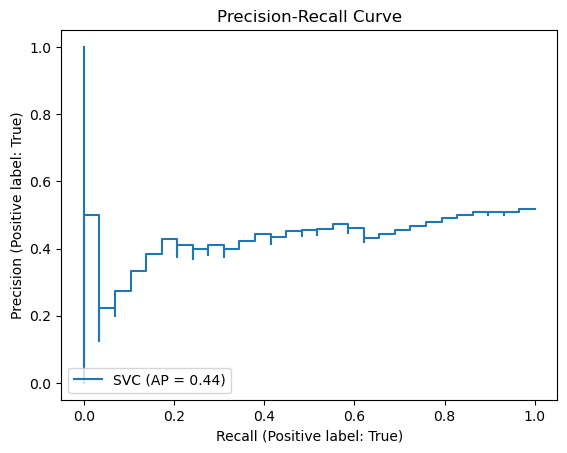

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Create a Precision-Recall curve
disp = plot_precision_recall_curve(svm, X_test_scaled, y_test)
disp.ax_.set_title('Precision-Recall Curve')
plt.show()


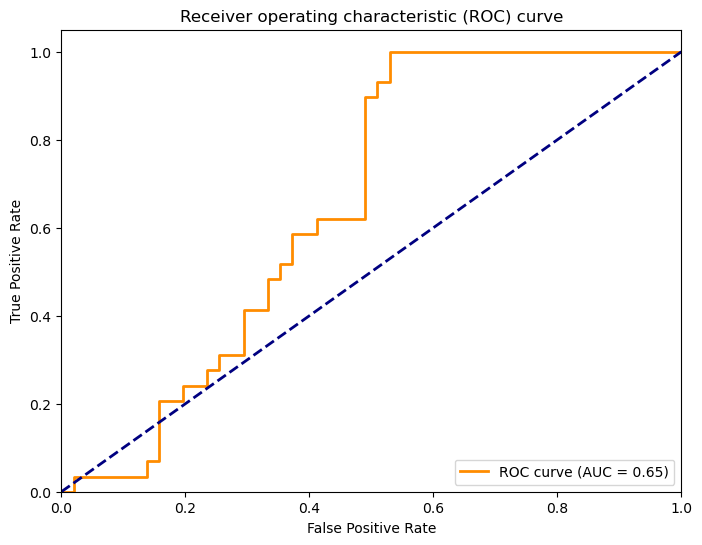

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the probabilities for each class on the test set
y_score = svm.decision_function(X_test_scaled)

# Compute the ROC curve and area under the curve (AUC) for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
